# Inicialización

Definamos algunas variables de entorno que utilizaremos a lo largo de este notebook:

In [1]:
from pathlib import Path

CDPP_TP1 = Path.cwd()

### Simulador CD++

In [9]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1/src
#pwd
#Comentar make clean ante un error
make clean

make -j4

g++ -c -I../../../src/cd++/.ipynb_checkpoints -I../../../src/cd++/atomics -I../../../src/cd++/atomics/cpu -I../../../src/cd++/atomics/cpu/obj -I../../../src/cd++/atomics/generator -I../../../src/cd++/atomics/generator/.ipynb_checkpoints -I../../../src/cd++/atomics/generator/obj -I../../../src/cd++/atomics/qss -I../../../src/cd++/atomics/qss/obj -I../../../src/cd++/atomics/queue -I../../../src/cd++/atomics/queue/obj -I../../../src/cd++/atomics/transducer -I../../../src/cd++/atomics/transducer/obj -I../../../src/cd++/cell -I../../../src/cd++/cell/obj -I../../../src/cd++/evt -I../../../src/cd++/evt/obj -I../../../src/cd++/main -I../../../src/cd++/main/obj -I../../../src/cd++/misc -I../../../src/cd++/misc/math -I../../../src/cd++/misc/math/obj -I../../../src/cd++/misc/obj -I../../../src/cd++/model -I../../../src/cd++/model/obj -I../../../src/cd++/model/state -I../../../src/cd++/model/state/obj -I../../../src/cd++/msg -I../../../src/cd++/msg/obj -I../../../src/cd++/parser -I../../../src/cd+

In file included from ../../../src/cd++/val/tbool.h:21,
                 from ../../../src/cd++/val/real.h:22,
                 from ../../../src/cd++/utils/strutil.h:28,
                 from ../../../src/cd++/model/pmodeladm.h:29,
                 from ../../../src/cd++/model/port.h:25,
                 from ../../../src/cd++/model/model.h:26,
                 from ../../../src/cd++/model/atomic.h:24,
                 from Medio.h:16,
                 from Medio.cpp:10:
../../../src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
../../../src/cd++/val/tuple_value.h:117:13:   required from ‘bool Tuple<T>::equals(const AbstractValue&) const [with T = Real]’
../../../src/cd++/val/tuple_value.h:107:6:   required from here
../../../src/cd++/val/tuple_value.h:59:37: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<Real, std::allocator<Real> >::size_type’ {aka ‘long unsigned int’} [-Wsign-compa

## Simulación del modelo con CD++

Ahora nos paramos en donde se encuentra el ejecutable de la simulación y corremos la simulación:

In [32]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./tests/test06_persona_hablaTiempoExpEligiendoUnif.ma \
         -o ./tests/test06_persona_hablaTiempoExpEligiendoUnif.out\
        -l ./tests/test06_persona_hablaTiempoExpEligiendoUnif.log \
        -t 01:00:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ./tests/test06_persona_hablaTiempoExpEligiendoUnif.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: ./tests/test06_persona_hablaTiempoExpEligiendoUnif.log
Output to: ./tests/test0

### Análisis de los resultados

Veamos el resultado:

In [4]:
import networkx as nx
import numpy as np
def generarMA(n, maxG, ps, infs, pcs, tss, grados, pms, nroMedios, psMedios,
              periodos_emision, pcMedios, periodo_info=36000, file="model.ma"):
    
    grados[grados>maxG] = maxG
    if(grados.sum() % 2 != 0):
        if(grados[0] < maxG):
            grados[0] = grados[0]+1
        else:
            grados[0] = grados[0]-1
            
    ps[ps>1] = 1
    ps[ps<-1] = -1

    infs[infs>1] = 1
    infs[infs<0] = 0
    
    pcs[pcs>1] = 1
    pcs[pcs<0] = 0

    tss[infs>1] = 1
    tss[infs<0] = 0
    
    pms[pms<0] = 0    
    
    
    f = open(CDPP_TP1.joinpath("model/"+file),'w')
    f.write("[Top]\n")
    f.write("components : Sociedad\n")
    f.write("components : generador@Generator\n")
    for i in range(0,nroMedios):
        f.write("components : Medio"+str(i)+"@Medio\n")
    
    #f.write("in: infoRequest\n")

    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")
    
    #f.write("Link : infoRequest infoRequest@Sociedad\n")
    f.write("Link : out@generador infoRequest@Sociedad\n")
    for i in range(0,n):
        f.write("Link : info_out"+str(i)+"@Sociedad info_out"+str(i)+"\n")
        
    for i in range(0,nroMedios): 
        f.write("Link : out@Medio"+str(i)+" inMedios@Sociedad\n")

    f.write("\n[Sociedad]\n")
    for i in range(0,n):
        f.write("components: Persona"+str(i)+"@Persona\n")
    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")

    f.write("in : infoRequest\n")
    f.write("in : inMedios\n")
        
    for i in range(0,n):
        f.write("Link : outInfo@Persona"+str(i)+" info_out"+str(i)+"\n")
        f.write("Link : infoRequest infoRequest@Persona"+str(i)+"\n")
        f.write("Link : inMedios inMedios@Persona"+str(i)+"\n")

    conf_model = nx.configuration_model(grados)
    conf_model = nx.Graph(conf_model)
    conf_model.remove_edges_from(nx.selfloop_edges(conf_model))

    puerto_mas_alto = dict.fromkeys(range(0,n),1)

    for node in range(0,n):

        neighborhood = nx.all_neighbors(conf_model, node)
        degree = nx.degree(conf_model, node)
        nombre = "@Persona"+str(node)

        for neighbor in neighborhood:
            if neighbor > node:
                port = puerto_mas_alto[node]
                puerto_mas_alto[node] += 1

                out_port = "outPort"+str(port)
                in_port = "inPort"+str(port)

                port_neighbor = puerto_mas_alto[neighbor]
                puerto_mas_alto[neighbor] += 1

                nombre_vecino = "@Persona"+str(neighbor)
                out_port_neighbor = "outPort"+str(port_neighbor)
                in_port_neighbor = "inPort"+str(port_neighbor)

                f.write("Link : "+out_port+nombre+" "+in_port_neighbor+nombre_vecino+"\n")
                f.write("Link : "+out_port_neighbor+nombre_vecino+" "+in_port+nombre+"\n")

    for i in range(0,n):
        f.write("\n[Persona"+str(i)+"]\n")
        f.write("p : "+str(ps[i])+"\n")
        f.write("influenciabilidad : "+str(infs[i])+"\n")
        f.write("poder_convencimiento : "+str(pcs[i])+"\n")
        f.write("tiempo_sillon : "+str(tss[i])+"\n")
        f.write("periodo_medio : "+str(pms[i])+"\n")
        f.write("grado : "+str(nx.degree(conf_model, i))+"\n")
        
    for i in range(0,nroMedios):
        f.write("\n[Medio"+str(i)+"]\n")
        f.write("P : "+str(psMedios[i])+"\n")
        f.write("Periodo_de_emision : "+str(periodos_emision[i])+"\n")
        f.write("Poder_de_convencimiento : "+str(pcMedios[i])+"\n")
    
    f.write("\n[generador]\n")
    f.write("distribution : constant\n")
    f.write("value : "+str(periodo_info)+"\n")
    f.write("init : 1\n")
    f.write("increment : 0\n")

    f.close()
    return conf_model

Experimentos

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats


def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

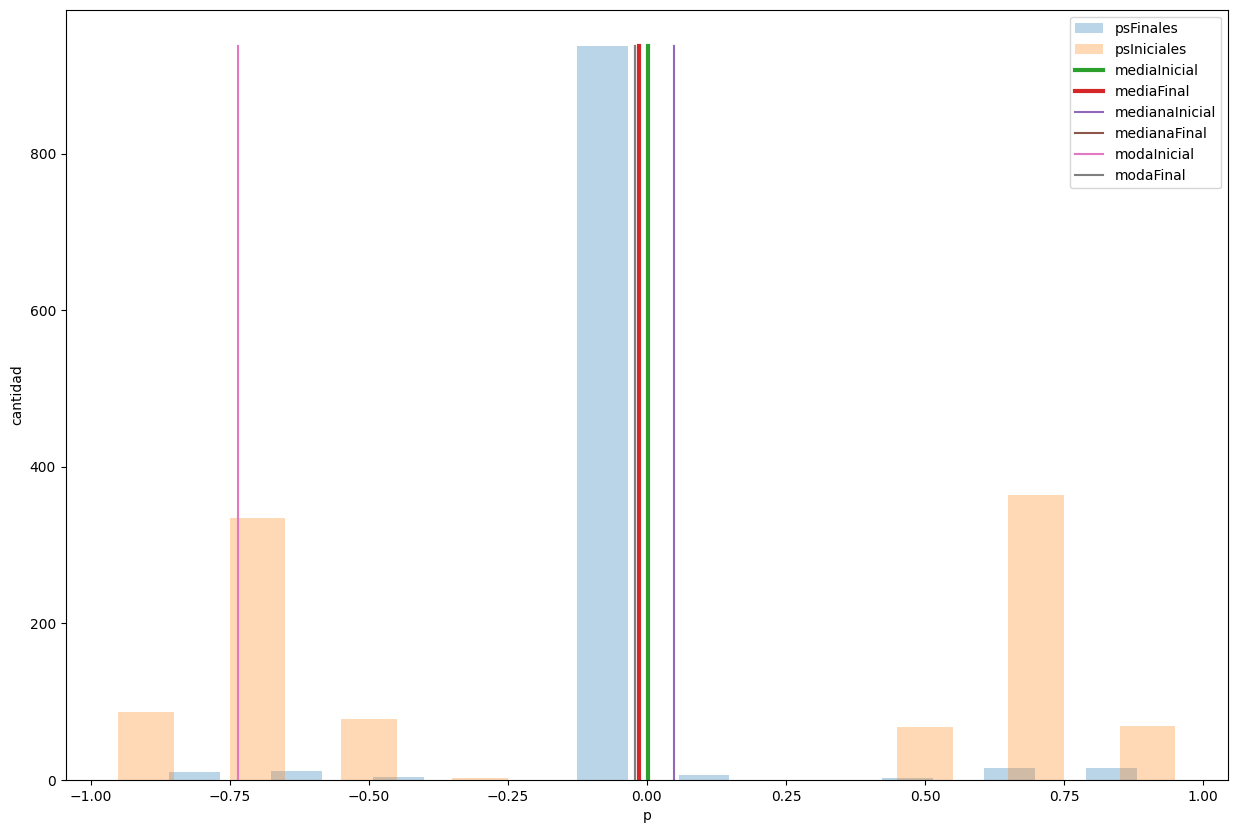

In [54]:
#Sociedad Polarizada - Sin Medios
#Genero los valores para la sociedad polarizada con inf=0.2 y pc=0.2

n = 1000

ps = np.append(np.random.normal(0.7,0.1,int(n/2)),np.random.normal(-0.7,0.1,int(n/2)))
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.2,0.05,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 0, psMedios = [],
                  periodos_emision = [], pcMedios = [], 
                  file="exp_polarizada_sinMedios.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_sinMedios.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

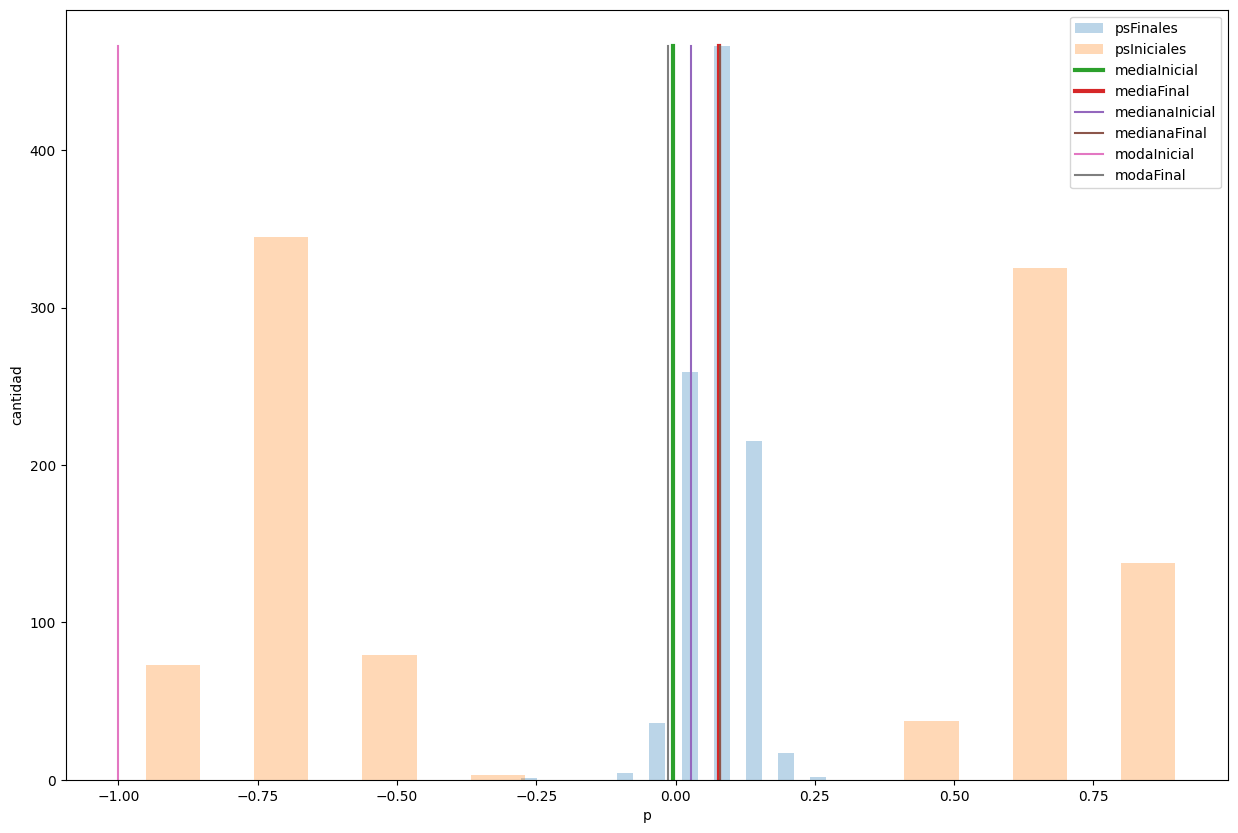

In [70]:
#Sociedad polarizada - medio homogeneo
#Genero los valores para la sociedad polarizada con inf=0.2 y pc=0.2
grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_medioCentrado.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_medioCentrado.out"


salida_inf2 = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida_inf2.loc[salida['time'] == salida['time'].min()]

ps_finales = salida_inf2.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

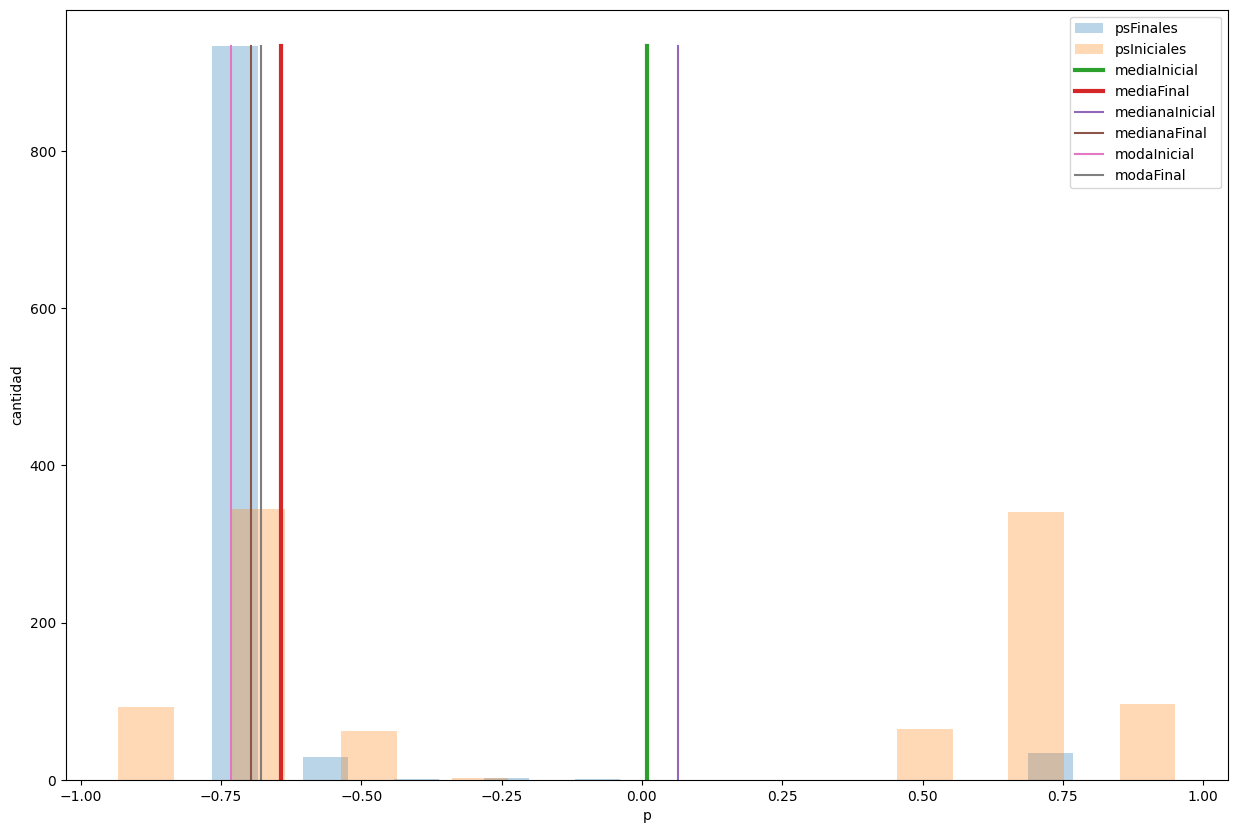

In [44]:
#Sociedad Polarizada - Medios Polarizados


graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 2, psMedios = [-0.8,0.8],
                  periodos_emision = [6,6], pcMedios = [0.5,0.5], 
                  file="exp_polarizada_mediosPolarizados.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_mediosPolarizados.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

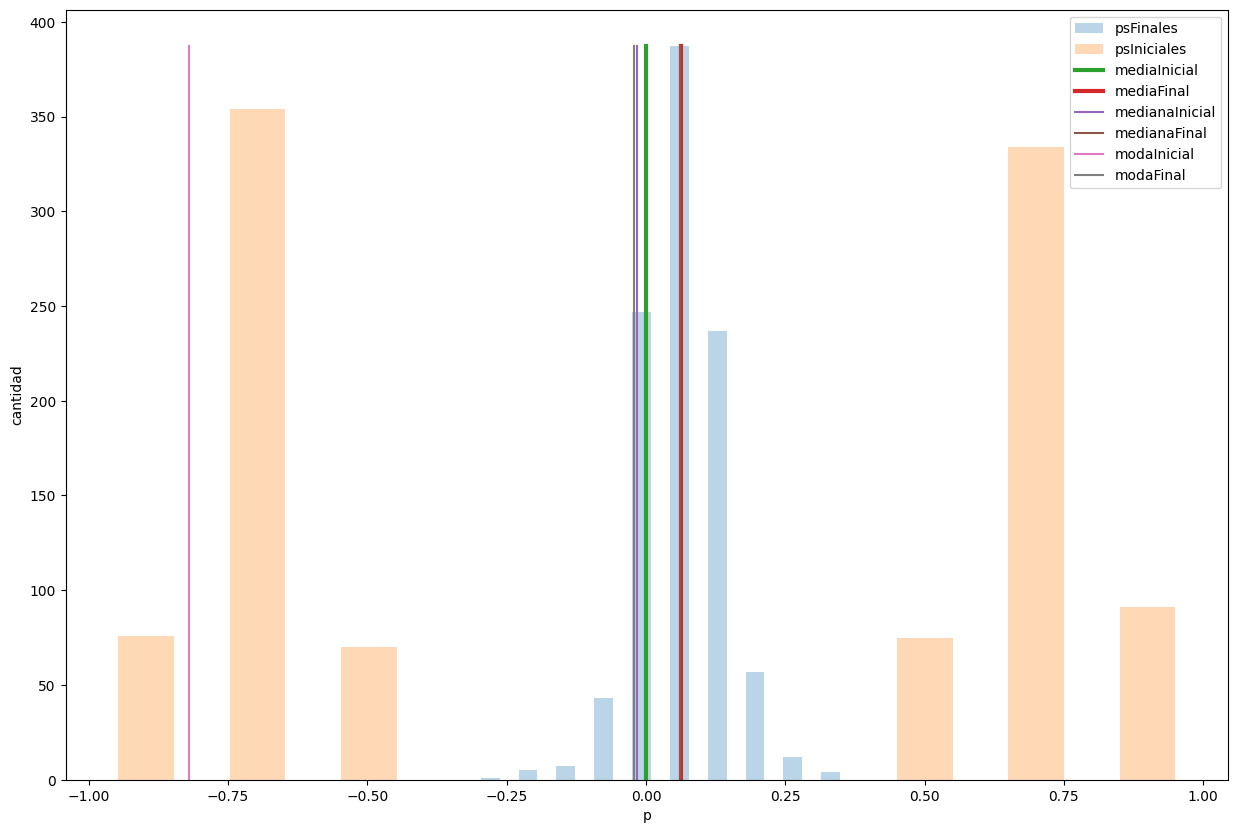

In [48]:
#Sociedad Polarizada - Medios Heterogeneos


graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 5, psMedios = [-0.9, -0.5, 0, 0.5, 0.9],
                  periodos_emision = [6,6,6,6,6], 
                  pcMedios = [0.5,0.5,0.5,0.5,0.5], 
                  file="exp_polarizada_mediosHeterogeneos.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_mediosHeterogeneos.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

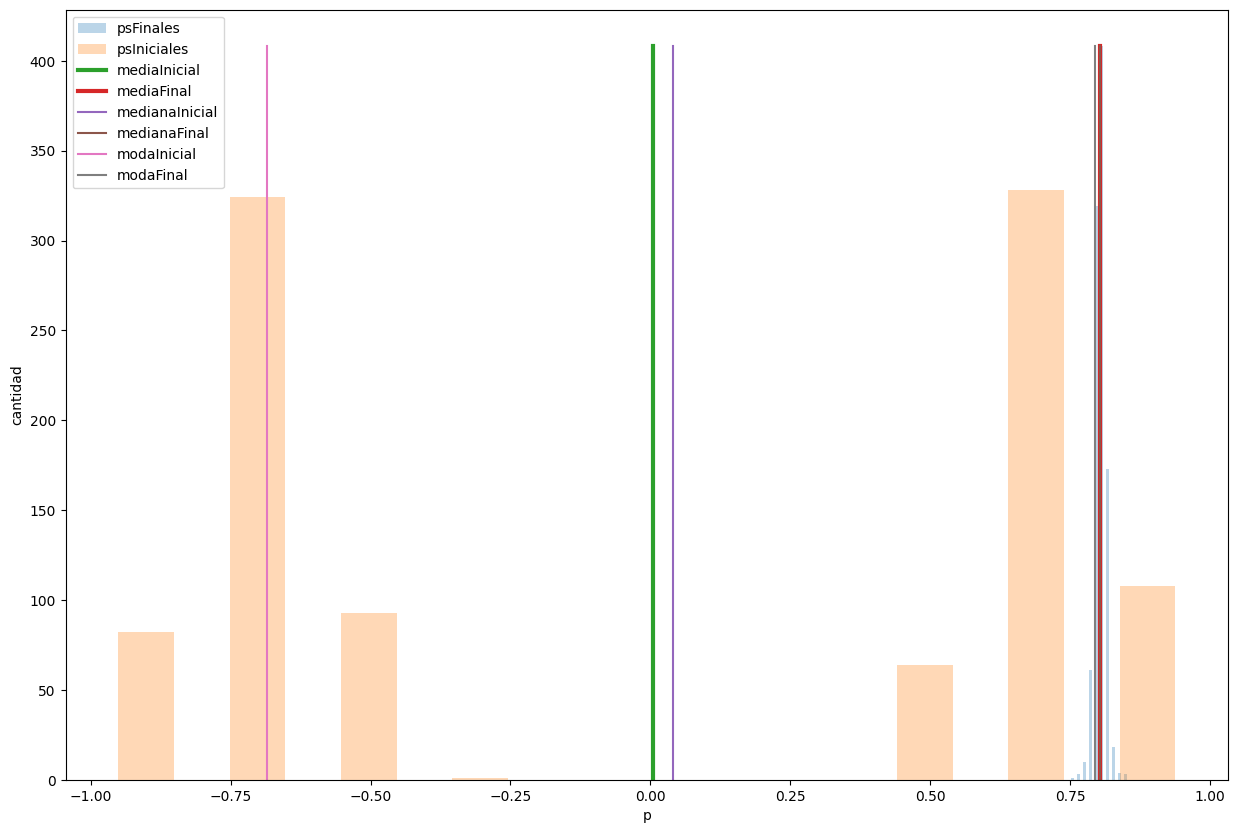

In [71]:
# Sociedad Polarizada, medio homogeneo extremista
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0.8],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_medioExtremista.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_medioExtremista.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

In [67]:
#Sociedad Polarizada - Medio Homogeneo
#Genero los valores para la sociedad polarizada con inf=0.1 y pc=0.1
n = 1000

ps = np.append(np.random.normal(0.7,0.1,int(n/2)),np.random.normal(-0.7,0.1,int(n/2)))
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.1,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.1,0.05,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_inf-0.1_pc-0.1_medioCentrado.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_inf-0.1_pc-0.1_medioCentrado.out"

salida_inf1 = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )



In [68]:

#Genero los valores para la sociedad polarizada con inf=0.3 y pc=0.3
n = 1000

ps = np.append(np.random.normal(0.7,0.1,int(n/2)),np.random.normal(-0.7,0.1,int(n/2)))
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.3,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.3,0.05,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_inf-0.3_pc-0.3_medioCentrado.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_inf-0.3_pc-0.3_medioCentrado.out"


salida_inf3 = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )



In [69]:

#Genero los valores para la sociedad polarizada con inf=0.5 y pc=0.5
n = 1000

ps = np.append(np.random.normal(0.7,0.1,int(n/2)),np.random.normal(-0.7,0.1,int(n/2)))
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.5,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.5,0.05,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_inf-0.5_pc-0.5_medioCentrado.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_inf-0.5_pc-0.5_medioCentrado.out"


salida_inf5 = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )



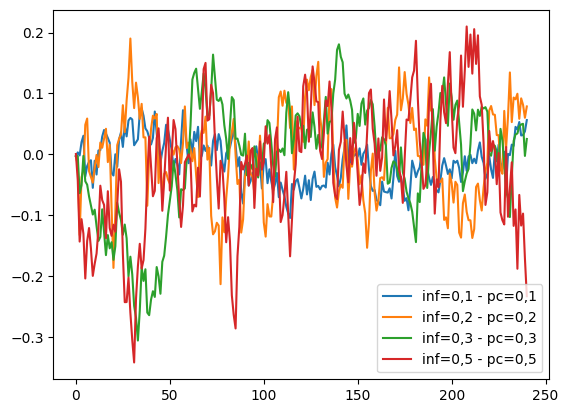

In [79]:
medias_inf1 = meansFromDF(salida_inf1)
medias_inf2 = meansFromDF(salida_inf2)
medias_inf3 = meansFromDF(salida_inf3)
medias_inf5 = meansFromDF(salida_inf5)

plt.plot(medias_inf1['P_media'], label="inf=0,1 - pc=0,1")
plt.plot(medias_inf2['P_media'], label="inf=0,2 - pc=0,2")
plt.plot(medias_inf3['P_media'], label="inf=0,3 - pc=0,3")
plt.plot(medias_inf5['P_media'], label="inf=0,5 - pc=0,5")
plt.legend()
plt.show()